# Diplodatos Kaggle Competition

We present this peace of code to create the baseline for the competition, and as an example of how to deal with these kind of problems. The main goals are that you:

1. Explore the data and learn from it
1. Try different models and see which one fits the best the given data
1. Get a higher score than the given one in the current baseline example
1. Try to get the highest score in the class :)

In [38]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [39]:
train_df = pd.read_csv("../data/travel_insurance_prediction_train.csv")
test_df = pd.read_csv("../data/travel_insurance_prediction_test.csv")

## Explore the Data

Is your task to explore the data, do analysis over it and get insights, then use those insights to better pick a model.

In [40]:
train_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


<Figure size 1440x864 with 0 Axes>

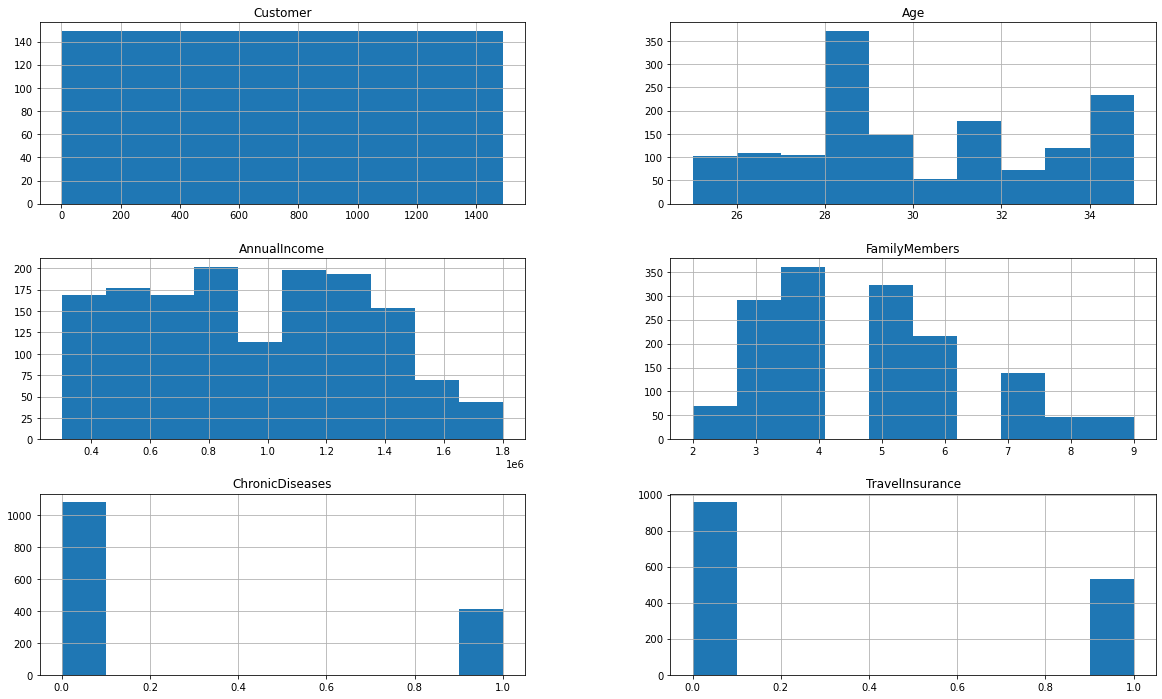

In [41]:
plt.figure(figsize=(20,12))
g=train_df.hist(figsize=(20,12))

In [42]:
train_df.columns

Index(['Customer', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [43]:
selected_columns=[[ 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance']]
numeric_columns=[ 'Age', 'AnnualIncome','FamilyMembers']
cat_columns=['FamilyMembers', 'Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer','EverTravelledAbroad', 'TravelInsurance']

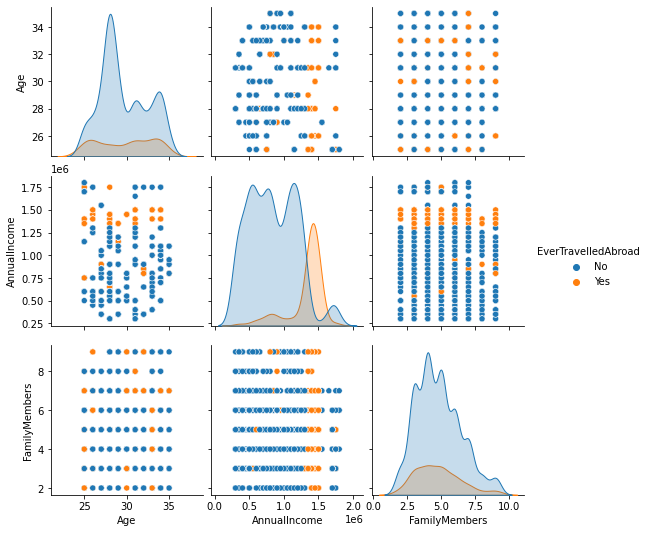

In [44]:
sns.pairplot(data=train_df , x_vars=numeric_columns , y_vars=numeric_columns, hue=cat_columns[5])

In [45]:
train_df[[ 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance']].corr('spearman')

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
Age,1.000000,0.001116,0.005776,0.006821,0.058329
AnnualIncome,0.001116,1.000000,-0.005856,0.003513,0.396871
FamilyMembers,0.005776,-0.005856,1.000000,0.022799,0.075657
ChronicDiseases,0.006821,0.003513,0.022799,1.000000,0.019600
TravelInsurance,0.058329,0.396871,0.075657,0.019600,1.000000


In [46]:
for column in cat_columns:
    print(pd.crosstab(index=train_df[column],columns=train_df[ 'TravelInsurance'],margins=True,normalize='index'))
    print('===================')

TravelInsurance         0         1
FamilyMembers                      
2                0.666667  0.333333
3                0.646048  0.353952
4                0.698061  0.301939
5                0.686335  0.313665
6                0.560185  0.439815
7                0.557971  0.442029
8                0.652174  0.347826
9                0.489362  0.510638
All              0.642953  0.357047
TravelInsurance                      0         1
Employment Type                                 
Government Sector             0.769053  0.230947
Private Sector/Self Employed  0.591296  0.408704
All                           0.642953  0.357047
TravelInsurance         0         1
GraduateOrNot                      
No               0.635135  0.364865
Yes              0.644322  0.355678
All              0.642953  0.357047
TravelInsurance         0         1
ChronicDiseases                    
0                0.648749  0.351251
1                0.627737  0.372263
All              0.642953  0.357047

Parecen mas relevante num: AnnualIncome

Parecen mas relevante de las cat: Employment Type, FrequentFlyer, EverTravelledAbroad

<AxesSubplot:xlabel='AnnualIncome', ylabel='Count'>

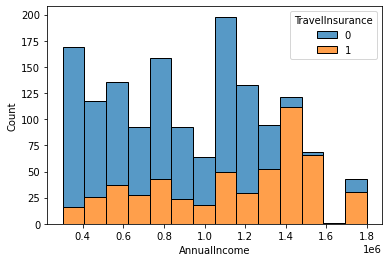

In [47]:
sns.histplot(data=train_df,x='AnnualIncome',hue='TravelInsurance',multiple='stack')

<AxesSubplot:xlabel='FamilyMembers', ylabel='Count'>

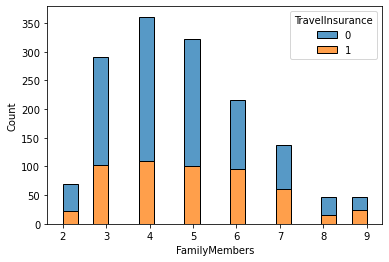

In [48]:
sns.histplot(data=train_df,x='FamilyMembers',hue='TravelInsurance',multiple='stack')

<AxesSubplot:xlabel='Age', ylabel='Count'>

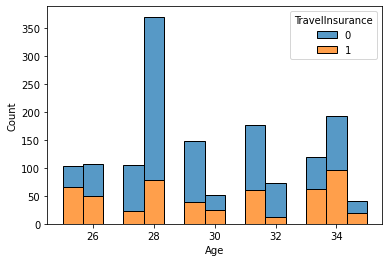

In [49]:
sns.histplot(data=train_df,x='Age',hue='TravelInsurance',multiple='stack')#,y='TravelInsurance',hue='TravelInsurance') [train_df['TravelInsurance']==0]

<AxesSubplot:xlabel='FamilyMembers', ylabel='AnnualIncome'>

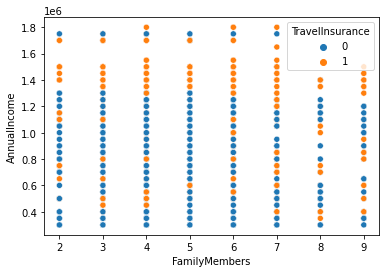

In [50]:
sns.scatterplot(data=train_df,x='FamilyMembers',y='AnnualIncome',hue='TravelInsurance')

<AxesSubplot:xlabel='Age', ylabel='AnnualIncome'>

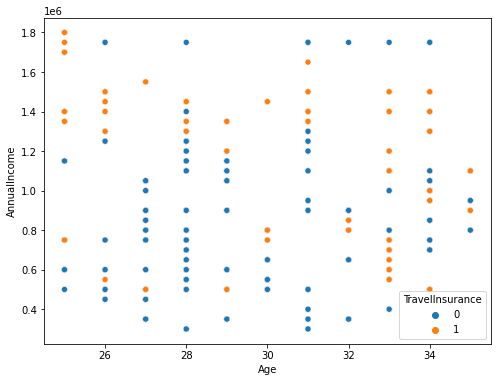

In [51]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_df,x='Age',y='AnnualIncome',hue='TravelInsurance')

<AxesSubplot:xlabel='AnnualIncome', ylabel='Count'>

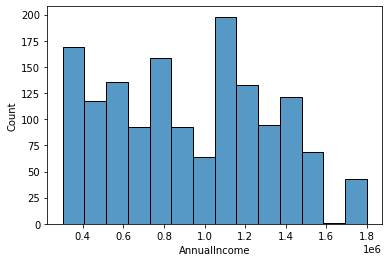

In [52]:
sns.histplot(train_df['AnnualIncome'])

In [53]:
test_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,1491,29,Private Sector/Self Employed,Yes,1100000,4,0,No,No
1,1492,28,Private Sector/Self Employed,Yes,750000,5,1,Yes,No
2,1493,31,Government Sector,Yes,1500000,4,0,Yes,Yes
3,1494,28,Private Sector/Self Employed,Yes,1400000,3,0,No,Yes
4,1495,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes


**TravelInsurance** is the column that we should predict. That column is not present in the test set.

In [54]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             497 non-null    int64 
 1   Age                  497 non-null    int64 
 2   Employment Type      497 non-null    object
 3   GraduateOrNot        497 non-null    object
 4   AnnualIncome         497 non-null    int64 
 5   FamilyMembers        497 non-null    int64 
 6   ChronicDiseases      497 non-null    int64 
 7   FrequentFlyer        497 non-null    object
 8   EverTravelledAbroad  497 non-null    object
dtypes: int64(5), object(4)
memory usage: 35.1+ KB


In [56]:
train_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1490.000000,1490.000000,1.490000e+03,1490.000000,1490.000000,1490.000000
mean,745.500000,29.667114,9.278188e+05,4.777181,0.275839,0.357047
std,430.270264,2.880994,3.811715e+05,1.640248,0.447086,0.479290
min,1.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,373.250000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,745.500000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1117.750000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1490.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [57]:
test_df.describe()

,Customer,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,497.000000,497.000000,4.970000e+02,497.00000,497.000000
mean,1739.000000,29.599598,9.475855e+05,4.68008,0.283702
std,143.615807,3.010506,3.635818e+05,1.51347,0.451248
min,1491.000000,25.000000,3.000000e+05,2.00000,0.000000
25%,1615.000000,28.000000,6.500000e+05,4.00000,0.000000
50%,1739.000000,29.000000,9.500000e+05,4.00000,0.000000
75%,1863.000000,32.000000,1.250000e+06,6.00000,1.000000
max,1987.000000,35.000000,1.750000e+06,9.00000,1.000000


## Baseline

In this section we present a baseline based on a decision tree classifier.

Many of the attributes are binary, there are a couple of numeric attributes, we might be able to one-hot (e.g. family members), or event discretize (age and anual income), this will come more clearly after the EDA.

In [58]:
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

### Transform the columns into features

First we need to transform the columns into features. The type of features we use will have a direct impact on the final result. In this example we decided to discretize some numeric features and make a one hot encoding of others. The number of bins, what we use as a one hot encoding, etc, is all up to you to try it out.

In [270]:
transformer = make_column_transformer(
    (KBinsDiscretizer(n_bins=15, encode="ordinal", strategy="quantile"), [ "AnnualIncome"]),
    (KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), ["Age"]),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
     ["Employment Type", "GraduateOrNot", "FamilyMembers", "FrequentFlyer", "EverTravelledAbroad"]),
    remainder="passthrough")

In [ ]:
#transformer = make_column_transformer(
#    (KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), ["Age", "AnnualIncome"]),
#    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
#     ["Employment Type", "FrequentFlyer", "EverTravelledAbroad"]),
#    remainder="passthrough")

We transform the train and test data. In order to avoid overfitting is better to remove the `Customer` column and we don't want the `TravelInsurance` column as part of the attributes either.

In [69]:
train_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


In [70]:
#train_df.drop(columns=["Customer", "TravelInsurance", "GraduateOrNot", "FamilyMembers","ChronicDiseases"]).head()

In [271]:
# The data for training the model
X_train = transformer.fit_transform(train_df.drop(columns=["Customer", "TravelInsurance"]))
y_train = train_df["TravelInsurance"].values

# The test data is only for generating the submission
X_test = transformer.transform(test_df.drop(columns=["Customer"]))

In [272]:
X_train.shape

(1490, 19)

In [273]:
X_train[:,0].max()

14.0

In [74]:
#transf_ver = make_column_transformer(
#    (KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), ["Age", "AnnualIncome"]),
#    remainder="passthrough")

In [ ]:
#X_train_ver = transf_ver.fit_transform(train_df.drop(columns=["Customer", "TravelInsurance"]))

In [ ]:
#X_train_ver

# Modelos

## Decision Tree - Baseline

#### Grid Search

We do a Grid Search for the Decision Tree (this can be replaced by a randomized search if the model is too complex).

In [274]:
search_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 5 , 7, 10],
    'max_depth': [3, 6, 10, 15]
}
tree = DecisionTreeClassifier(random_state=42)
tree_clf = GridSearchCV(tree, search_params, cv=5, scoring='f1', n_jobs=-1)
tree_clf.fit(X_train, y_train)

best_tree_clf = tree_clf.best_estimator_

In [275]:
best_tree_clf

DecisionTreeClassifier(max_depth=10, min_samples_leaf=7, random_state=42)

#### Check Results

We can print the results of the best estimator found on the whole training set (we could also set apart a validation set if we find it useful).

In [276]:
Dtree_results=tree_clf.cv_results_
Dtree_results_fr=pd.DataFrame(Dtree_results)
Dtree_results_fr[Dtree_results_fr.rank_test_score<5][['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
13,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.706650,0.051891,1
14,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.699289,0.041241,3
18,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.698476,0.046323,4
33,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.703840,0.049263,2


In [278]:
print(classification_report(y_train, best_tree_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       958
           1       0.85      0.66      0.75       532

    accuracy                           0.84      1490
   macro avg       0.84      0.80      0.81      1490
weighted avg       0.84      0.84      0.83      1490



Resultados originales     
             precision    recall  f1-score   support

           0       0.83      0.94      0.88       958
           1       0.86      0.66      0.75       532

    accuracy                           0.84      1490
   macro avg       0.85      0.80      0.82      1490
weighted avg       0.84      0.84      0.84      1490

### Modelos lineales

In [279]:

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import make_pipeline

# Always scale the input. The most convenient way is to use a pipeline.
#lineal_model = make_pipeline(StandardScaler(),
 #                   SGDClassifier(max_iter=1000, tol=1e-3,random_state=0))
#clf.fit(X, Y)
scal=StandardScaler()
X_train_scaled = scal.fit_transform(X_train)

In [280]:
X_train_scaled

array([[-0.99049593,  1.32506537, -0.64003902, ...,  0.48949021,
        -0.48949021, -0.61717765],
       [-0.29423601, -0.22283538, -0.64003902, ...,  0.48949021,
        -0.48949021, -0.61717765],
       [ 0.86619718,  0.551115  , -0.64003902, ...,  0.48949021,
        -0.48949021, -0.61717765],
       ...,
       [ 0.86619718, -0.22283538, -0.64003902, ...,  0.48949021,
        -0.48949021, -0.61717765],
       [ 1.09828382,  0.551115  ,  1.56240473, ...,  0.48949021,
        -0.48949021, -0.61717765],
       [-0.75840929, -0.22283538, -0.64003902, ...,  0.48949021,
        -0.48949021, -0.61717765]])

In [281]:
search_params = {
    'loss': ['hinge', 'log','perceptron','squared_hinge'],
    'alpha': [1e-10,1e-5,1e-2,1e-1,1,10],
    #'max_depth': [3, 6, 10, 15]
}
sgd = SGDClassifier(random_state=42)
lineal_models = GridSearchCV(sgd, search_params, cv=5, scoring='f1', n_jobs=-1)
lineal_models.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 0.1, 1, 10],
                         'loss': ['hinge', 'log', 'perceptron',
                                  'squared_hinge']},
             scoring='f1')

In [282]:
best_lineal_model = lineal_models.best_estimator_
best_lineal_model

SGDClassifier(alpha=0.1, loss='squared_hinge', random_state=42)

In [283]:
lineals_results=lineal_models.cv_results_
lineals_results_fr=pd.DataFrame(lineals_results)
lineals_results_fr[lineals_results_fr.rank_test_score<5][['param_loss', 'param_alpha','params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_loss,param_alpha,params,mean_test_score,std_test_score,rank_test_score
3,squared_hinge,1e-10,"{'alpha': 1e-10, 'loss': 'squared_hinge'}",0.571477,0.044153,4
9,log,0.01,"{'alpha': 0.01, 'loss': 'log'}",0.587332,0.043483,3
11,squared_hinge,0.01,"{'alpha': 0.01, 'loss': 'squared_hinge'}",0.595511,0.034518,2
15,squared_hinge,0.1,"{'alpha': 0.1, 'loss': 'squared_hinge'}",0.599146,0.050072,1


In [284]:
print(classification_report(y_train, best_lineal_model.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       958
           1       0.79      0.45      0.58       532

    accuracy                           0.76      1490
   macro avg       0.77      0.69      0.71      1490
weighted avg       0.77      0.76      0.74      1490



## Kernels

In [285]:
from sklearn.svm import SVC

kernel_svm=SVC(random_state=0)

In [286]:
search_params_kernel = {
    'kernel': ['sigmoid', 'rbf','poly'],
    'C': [0.5,1,1.5,2,2.5,3,3.5],
    #'max_depth': [3, 6, 10, 15]
}

kernel_models_svm = GridSearchCV(kernel_svm, search_params_kernel, cv=5, scoring='f1', n_jobs=-1)
kernel_models_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [0.5, 1, 1.5, 2, 2.5, 3, 3.5],
                         'kernel': ['sigmoid', 'rbf', 'poly']},
             scoring='f1')

In [287]:
best_kernel_model = kernel_models_svm.best_estimator_
best_kernel_model

SVC(C=2, random_state=0)

In [288]:
kernels_results=kernel_models_svm.cv_results_
kernels_results_fr=pd.DataFrame(kernels_results)
kernels_results_fr[kernels_results_fr.rank_test_score<5][['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
10,"{'C': 2, 'kernel': 'rbf'}",0.691236,0.024973,1
13,"{'C': 2.5, 'kernel': 'rbf'}",0.687435,0.030264,4
16,"{'C': 3, 'kernel': 'rbf'}",0.689777,0.034326,3
19,"{'C': 3.5, 'kernel': 'rbf'}",0.690506,0.032208,2


In [289]:
print(classification_report(y_train, best_kernel_model.predict(X_train_scaled)))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       958
           1       0.88      0.61      0.72       532

    accuracy                           0.83      1490
   macro avg       0.85      0.78      0.80      1490
weighted avg       0.84      0.83      0.82      1490



## Random Forest

In [290]:
from sklearn import ensemble

In [291]:
randomF = ensemble.RandomForestClassifier(n_estimators=10, random_state=2)

In [292]:
param_grid_RF = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10, 20, 30,100],
    'max_features':['auto',None],
    'min_samples_leaf': [1, 2, 5 , 7, 10],
    'max_depth': [ 10, 15,20,30]
}
RF_models = GridSearchCV(randomF, param_grid_RF, cv=5, scoring='f1', n_jobs=-1)
RF_models.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=10, random_state=2),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 30],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 5, 7, 10],
                         'n_estimators': [10, 20, 30, 100]},
             scoring='f1')

In [293]:
best_RF_models = RF_models.best_estimator_
best_RF_models

RandomForestClassifier(max_depth=15, max_features=None, min_samples_leaf=2,
                       n_estimators=30, random_state=2)

In [294]:
RF_results=RF_models.cv_results_
RF_results_fr=pd.DataFrame(RF_results)
RF_results_fr[RF_results_fr.rank_test_score<5][['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
66,"{'criterion': 'gini', 'max_depth': 15, 'max_fe...",0.719255,0.039920,1
225,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.715261,0.033493,2
227,"{'criterion': 'entropy', 'max_depth': 15, 'max...",0.714096,0.044933,4
306,"{'criterion': 'entropy', 'max_depth': 30, 'max...",0.714821,0.037035,3


In [295]:
RF_results_fr[RF_results_fr.rank_test_score<5]['params'].values

array([{'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 30},
       {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 20},
       {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 100},
       {'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 30}],
      dtype=object)

In [296]:
print(classification_report(y_train, best_RF_models.predict(X_train)))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       958
           1       0.91      0.71      0.80       532

    accuracy                           0.87      1490
   macro avg       0.88      0.84      0.85      1490
weighted avg       0.88      0.87      0.87      1490



## KNN

In [297]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
#neigh.fit(X, y)

In [314]:
param_grid_neigh = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': [1,2,3,4,5, 8, 12, 16,17,18,19,20],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
    #'max_depth': [ 10, 15,20,30]
}
neigh_models = GridSearchCV(neigh, param_grid_neigh, cv=5, scoring='f1', n_jobs=-1)
neigh_models.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 8, 12, 16, 17, 18, 19,
                                         20],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='f1')

In [316]:
best_neigh_models = neigh_models.best_estimator_ #KNeighborsClassifier(algorithm= 'auto', n_neighbors= 4, p= 2, weights= 'distance').fit(X_train, y_train)#neigh_models.best_estimator_
best_neigh_models

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [317]:
neigh_results=neigh_models.cv_results_
neigh_results_fr=pd.DataFrame(neigh_results)
neigh_results_fr[neigh_results_fr.rank_test_score<5][['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
15,"{'algorithm': 'auto', 'n_neighbors': 4, 'p': 2...",0.676358,0.039592,1
63,"{'algorithm': 'ball_tree', 'n_neighbors': 4, '...",0.674496,0.034773,3
67,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '...",0.673354,0.036875,4
159,"{'algorithm': 'brute', 'n_neighbors': 4, 'p': ...",0.676358,0.039592,1


In [318]:
neigh_results_fr[neigh_results_fr.rank_test_score<5]['params'].values

array([{'algorithm': 'auto', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'},
       {'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'},
       {'algorithm': 'ball_tree', 'n_neighbors': 5, 'p': 2, 'weights': 'distance'},
       {'algorithm': 'brute', 'n_neighbors': 4, 'p': 2, 'weights': 'distance'}],
      dtype=object)

In [319]:
print(classification_report(y_train, best_neigh_models.predict(X_train)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       958
           1       0.97      0.80      0.88       532

    accuracy                           0.92      1490
   macro avg       0.93      0.89      0.91      1490
weighted avg       0.92      0.92      0.92      1490



## Red Neuronal?

## Generate the output

The last thing we do is generating a file that should be *submitted* on kaggle

In [303]:
test_id = test_df["Customer"]
test_pred = best_RF_models.predict(X_test)

submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["Customer", "TravelInsurance"])
submission.to_csv("../data/travel_insurance_submission.csv", header=True, index=False)

In [320]:
submission

,Customer,TravelInsurance
0,1491,0
1,1492,0
2,1493,1
3,1494,1
4,1495,1
...,...,...
492,1983,1
493,1984,0
494,1985,0
495,1986,0
